## **Sobre el Dataset: [Credit Score Classification Dataset](https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset)**

Este dataset se centra en la clasificación del puntaje crediticio de los individuos en función de características financieras, demográficas y de comportamiento. Es una herramienta ideal para explorar el análisis y la predicción de riesgos crediticios, lo cual es fundamental en sectores como la banca y las finanzas.

### **Contexto**
El puntaje crediticio es un indicador clave utilizado por instituciones financieras para evaluar la solvencia de un individuo. Este dataset simula escenarios del mundo real, proporcionando datos relevantes como ingresos, deudas, historial de pagos y gastos. Los estudiantes y analistas pueden usarlo para construir modelos predictivos que clasifiquen a los clientes según su puntaje crediticio, aplicando técnicas de machine learning y preprocesamiento de datos.

---

## **Diccionario de Datos**

- **Income**: Ingreso anual del individuo (en dólares).

- **Age**: Edad del individuo.

- **Experience**: Años de experiencia laboral del individuo.

- **Married/Single**: Estado civil (1 para casado, 0 para soltero).

- **House_Ownership**: Propiedad de vivienda (propietario/rentado/sin vivienda propia).

- **Car_Ownership**: Indica si el individuo posee un auto (1 para sí, 0 para no).

- **Profession**: Ocupación profesional del individuo.

- **CITY**: Ciudad de residencia.

- **STATE**: Estado de residencia.

- **Current_Loan_Expenses**: Gastos actuales en préstamos (en dólares).

- **Credit_Score**: Clasificación del puntaje crediticio (bajo/promedio/alto).

- **Household_Size**: Número de personas en el hogar.

- **Current_Credit_Balance**: Saldo actual en crédito (en dólares).

- **Monthly_Inhand_Salary**: Salario mensual neto recibido (en dólares).

- **Loan_Amount**: Monto del préstamo solicitado (en dólares).

- **Loan_Tenure**: Duración del préstamo (en meses).

- **Employment_Type**: Tipo de empleo (empleado/empresario).

- **Credit_History**: Historial crediticio del individuo.

---

**Observaciones, advertencias y descargos de responsabilidad**
1. Este dataset es ficticio y debe utilizarse únicamente con fines educativos y de análisis.
2. No debe emplearse para tomar decisiones financieras reales ni para evaluar solicitudes de crédito sin verificar fuentes reales.
3. Los datos fueron organizados y publicados por [Sujith Mandala](https://www.kaggle.com/sujithmandala) para proporcionar una base práctica para proyectos de ciencia de datos y machine learning.


In [29]:
import pandas as pd
import numpy as np

# Ruta del dataset
file_path = r"C:\Users\Andy\Documents\Proyecto_2\datasets\raw\Credit Score Classification Data.csv"

# Cargar el dataset
df = pd.read_csv(file_path)

# Inspeccionar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head(), "\n")

# Descripción general del dataset
print("Descripción general del dataset:")
print(f"Shape del dataset (filas, columnas): {df.shape}")
print("\nColumnas presentes en el dataset:")
print(df.columns)

# Valores nulos por columna
print("\nResumen de valores nulos por columna:")
null_values = df.isnull().sum()
print(null_values)
print(f"\nTotal de valores nulos en el dataset: {null_values.sum()}")

# Duplicados
print("\nVerificación de duplicados:")
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

# Eliminar duplicados
if duplicates > 0:
    print("\nEliminando filas duplicadas...")
    df = df.drop_duplicates()
    print(f"Shape después de eliminar duplicados: {df.shape}")


Primeras filas del dataset:
   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High   

Descripción general del dataset:
Shape del dataset (filas, columnas): (164, 8)

Columnas presentes en el dataset:
Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

Resumen de valores 

In [30]:
# Revisar los tipos de datos actuales de cada columna
print("Tipos de datos actuales por columna:")
print(df.dtypes)

# Identificar columnas categóricas y numéricas incorrectas
categorical_suggestions = []
numerical_suggestions = []

# Analizar cada columna para verificar si el tipo de dato es correcto
for col in df.columns:
    unique_values = df[col].nunique()
    if df[col].dtype == 'object':
        # Si es categórica pero tiene valores numéricos
        if df[col].str.isnumeric().all():
            numerical_suggestions.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        # Si es numérica pero parece categórica
        if unique_values < 10:
            categorical_suggestions.append(col)

# Cambiar columnas con tipo 'object' a 'category'
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].astype('category')

Tipos de datos actuales por columna:
Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object


In [31]:
# Crear un diccionario de variables
variable_dict = {
    "Age": {
        "Type": "int64",
        "Description": "Edad del individuo en años. Variable numérica continua que representa una característica fundamental para la evaluación de riesgos."
    },
    "Gender": {
        "Type": "category",
        "Description": "Género del individuo. Puede ser 'Male' (Hombre) o 'Female' (Mujer)."
    },
    "Income": {
        "Type": "int64",
        "Description": "Ingreso anual del individuo en dólares. Variable numérica que puede influir significativamente en la capacidad de pago."
    },
    "Education": {
        "Type": "category",
        "Description": "Nivel educativo del individuo. Por ejemplo, 'High School', 'Bachelor', 'Master', etc."
    },
    "Marital Status": {
        "Type": "category",
        "Description": "Estado civil del individuo. Puede ser 'Married' (Casado) o 'Single' (Soltero)."
    },
    "Number of Children": {
        "Type": "int64",
        "Description": "Número de hijos que tiene el individuo. Variable numérica discreta, importante para entender las responsabilidades familiares."
    },
    "Home Ownership": {
        "Type": "category",
        "Description": "Propiedad de vivienda del individuo. Puede ser 'Owned' (Vivienda propia) o 'Rented' (Vivienda alquilada)."
    },
    "Credit Score": {
        "Type": "category",
        "Description": "Puntaje de crédito del individuo. Puede ser 'Low' (Bajo), 'Average' (Promedio) o 'High' (Alto)."
    }
}

# Imprimir el diccionario de variables
for var, details in variable_dict.items():
    print(f"Variable: {var}")
    for key, value in details.items():
        print(f"  {key}: {value}")
    print()

Variable: Age
  Type: int64
  Description: Edad del individuo en años. Variable numérica continua que representa una característica fundamental para la evaluación de riesgos.

Variable: Gender
  Type: category
  Description: Género del individuo. Puede ser 'Male' (Hombre) o 'Female' (Mujer).

Variable: Income
  Type: int64
  Description: Ingreso anual del individuo en dólares. Variable numérica que puede influir significativamente en la capacidad de pago.

Variable: Education
  Type: category
  Description: Nivel educativo del individuo. Por ejemplo, 'High School', 'Bachelor', 'Master', etc.

Variable: Marital Status
  Type: category
  Description: Estado civil del individuo. Puede ser 'Married' (Casado) o 'Single' (Soltero).

Variable: Number of Children
  Type: int64
  Description: Número de hijos que tiene el individuo. Variable numérica discreta, importante para entender las responsabilidades familiares.

Variable: Home Ownership
  Type: category
  Description: Propiedad de viviend

--- Descriptivos para variables numéricas: ---
                    count          mean           std      min      25%  \
Age                 102.0     38.950980      8.709136     25.0     31.0   
Income              102.0  88308.823529  32417.071969  25000.0  65000.0   
Number of Children  102.0      0.656863      0.895479      0.0      0.0   

                        50%        75%       max  
Age                    39.0      46.75      53.0  
Income              86250.0  110000.00  162500.0  
Number of Children      0.0       1.00       3.0  

--- Descriptivos para variables categóricas: ---

Variable: Gender
- Número de categorías: 2
- Categorías únicas: ['Female', 'Male']
- Frecuencias:
Gender
Female    52
Male      50
Name: count, dtype: int64

Variable: Education
- Número de categorías: 5
- Categorías únicas: ["Associate's Degree", "Bachelor's Degree", 'Doctorate', 'High School Diploma', "Master's Degree"]
- Frecuencias:
Education
Bachelor's Degree      28
Master's Degree       

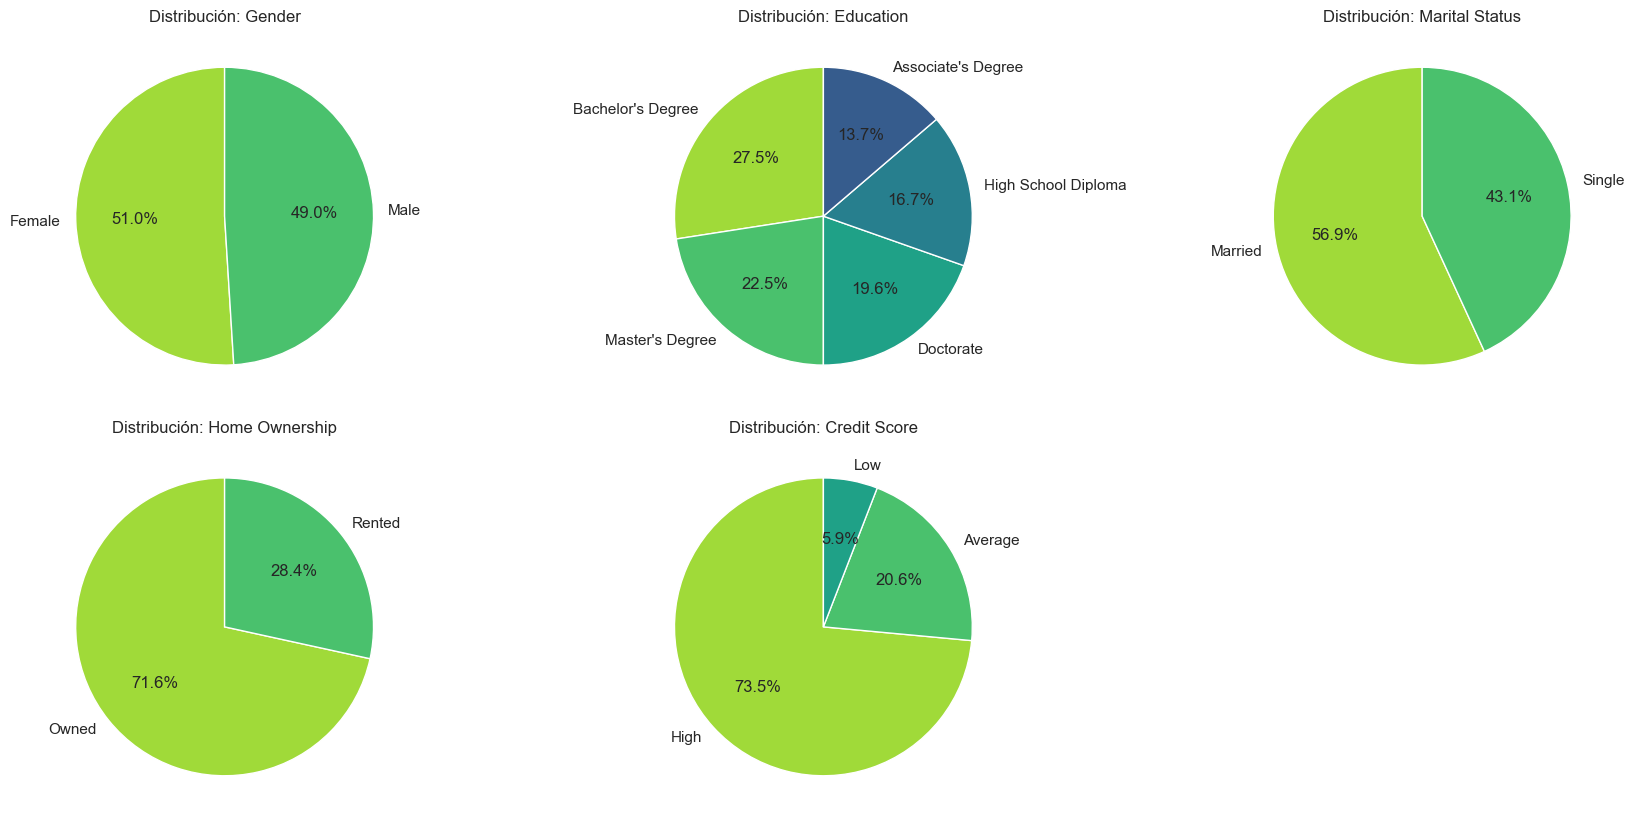

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas para variables numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("--- Descriptivos para variables numéricas: ---")
numerical_description = df[numerical_columns].describe().transpose()
print(numerical_description)

# Estadísticas descriptivas para variables categóricas
categorical_columns = df.select_dtypes(include=['category']).columns

print("\n--- Descriptivos para variables categóricas: ---")
for col in categorical_columns:
    print(f"\nVariable: {col}")
    print(f"- Número de categorías: {df[col].nunique()}")
    print(f"- Categorías únicas: {list(df[col].cat.categories)}")
    print(f"- Frecuencias:\n{df[col].value_counts()}")

# Visualizaciones para variables categóricas
sns.set_theme(style="whitegrid", palette="viridis")

# Graficar distribuciones categóricas
fig, axes = plt.subplots(
    nrows=(len(categorical_columns) // 3 + len(categorical_columns) % 3), 
    ncols=3, 
    figsize=(18, len(categorical_columns) * 2.5)
)
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis_r'), ax=axes[i]
    )
    axes[i].set_title(f"Distribución: {col}", fontsize=12)
    axes[i].set_ylabel('')  # Quitar etiqueta de y

# Eliminar ejes vacíos si hay un número impar de gráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar espacio entre gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout()
plt.show()

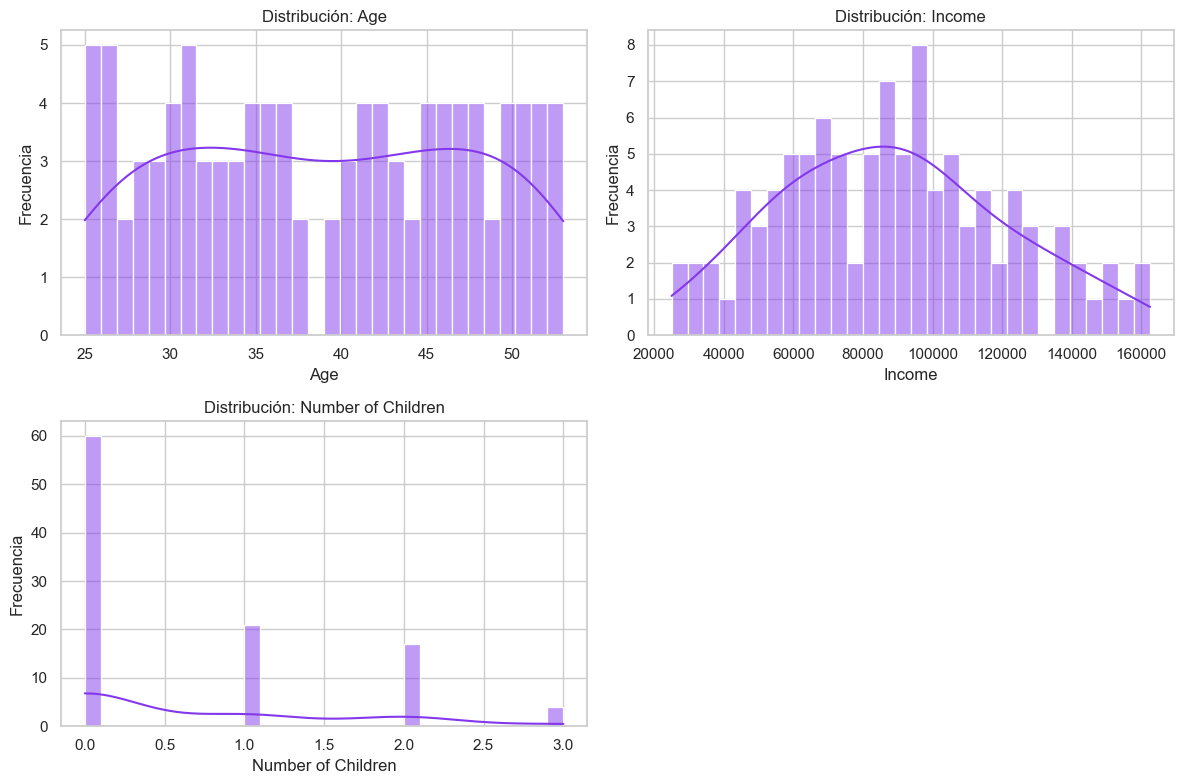

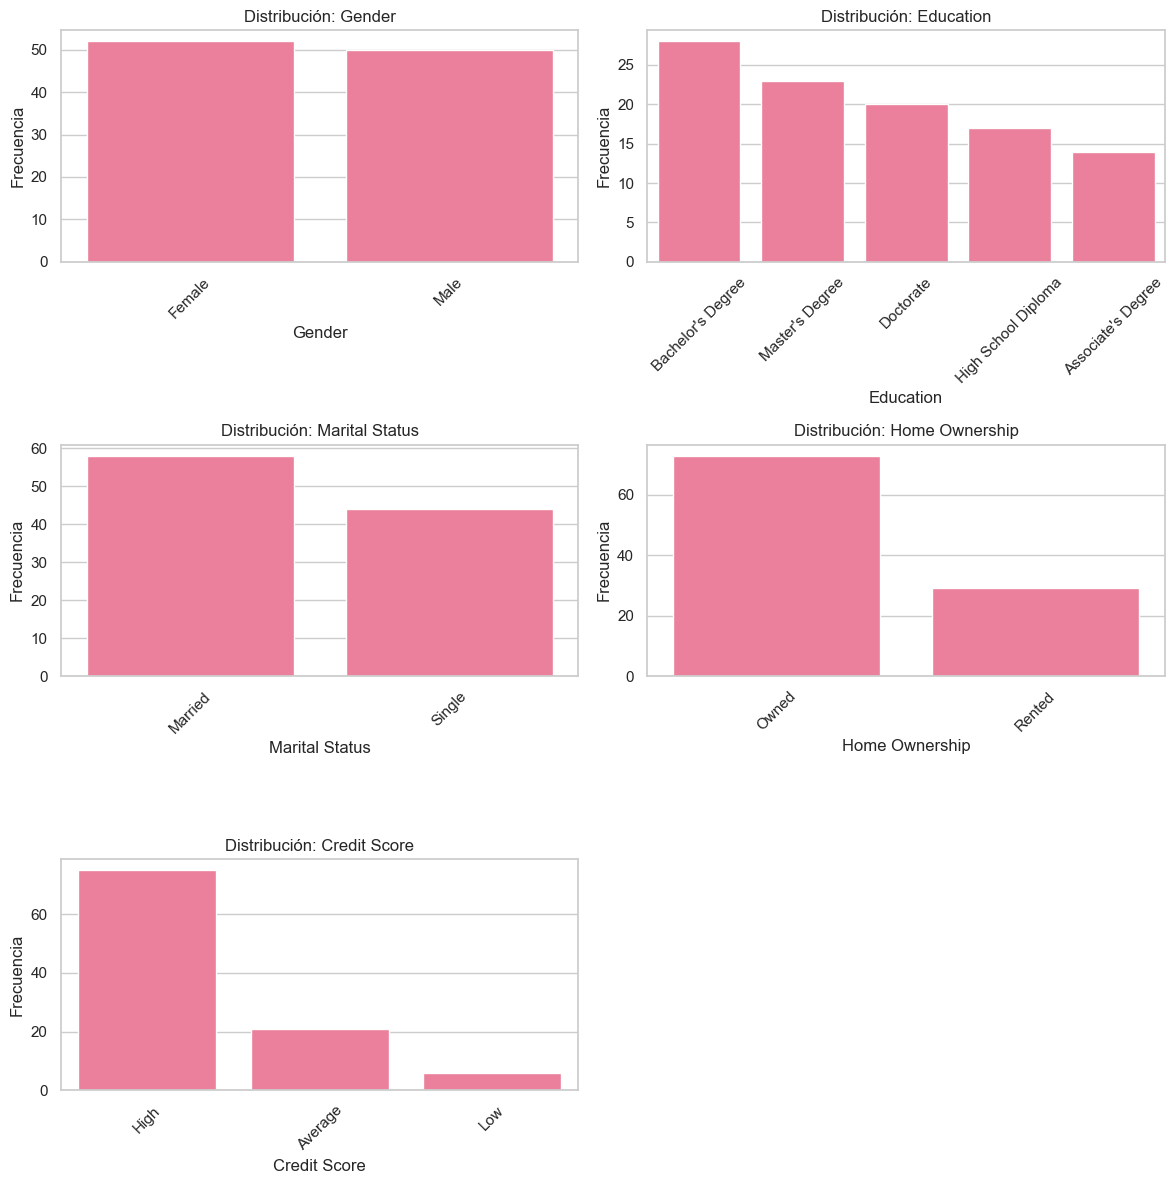

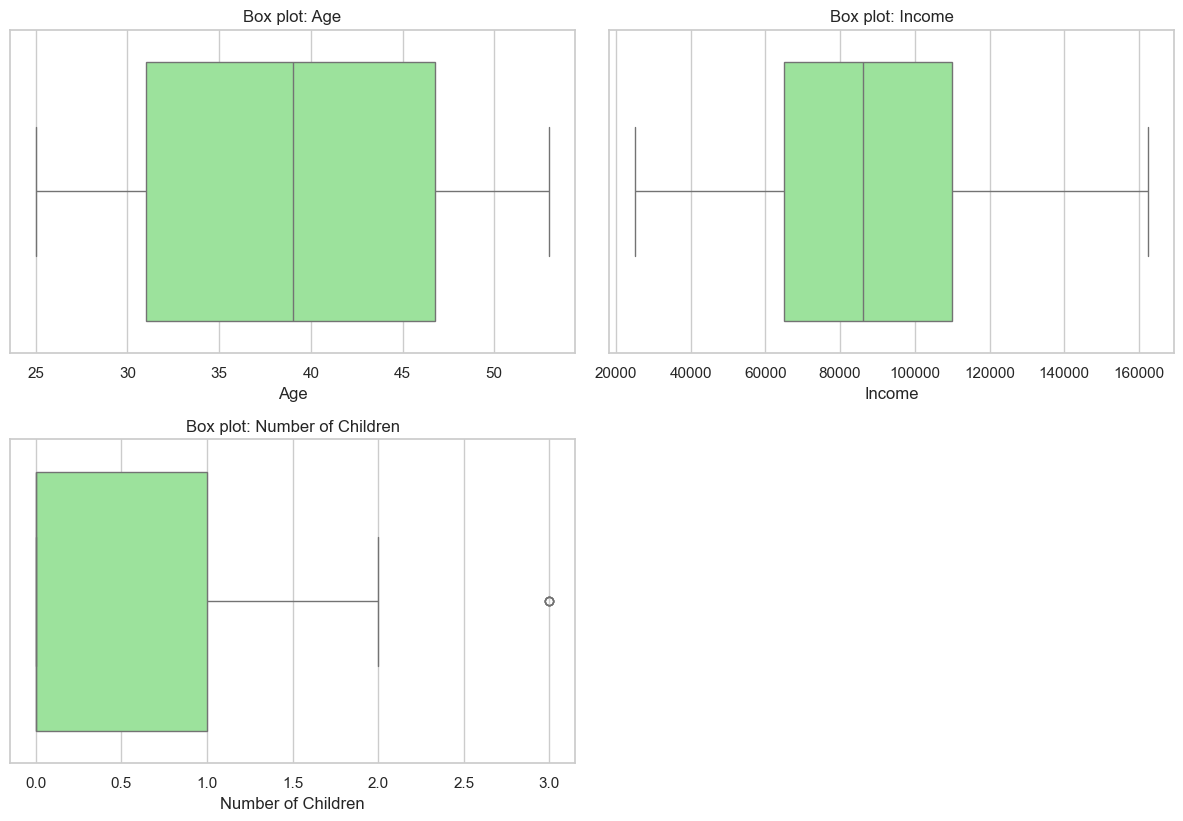

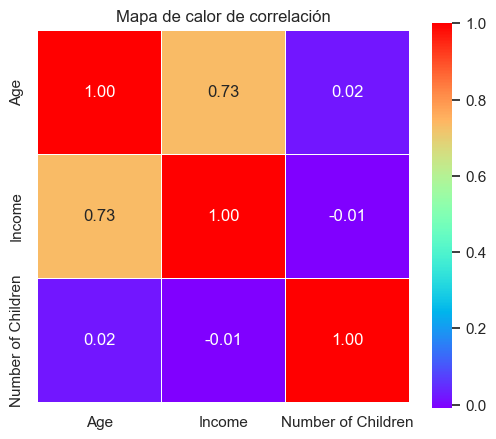

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general para los gráficos
sns.set_theme(style="whitegrid", palette="viridis")

#### **Visualizaciones: Distribución de variables** ####

# Variables numéricas: Histogramas con 2 gráficos por fila
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color='#8338ec')
    axes[i].set_title(f"Distribución: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si el número de gráficos es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Variables categóricas: Gráficos de barras con 2 gráficos por fila
categorical_columns = df.select_dtypes(include=['category']).columns
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], color='#fb6f92')
    axes[i].set_title(f"Distribución: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si el número de gráficos es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Variables numéricas: Box plots con 2 gráficos por fila
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Box plot: {col}")
    axes[i].set_xlabel(col)

# Eliminar ejes vacíos si el número de gráficos es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Visualizaciones: Correlación entre variables** ####

# Mapa de calor de correlación reducido
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(6, 5))  # Tamaño más compacto
sns.heatmap(correlation_matrix, annot=True, cmap="rainbow", fmt=".2f", linewidths=0.5, square=True)
plt.title("Mapa de calor de correlación")
plt.show()

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separar variables numéricas y categóricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Crear transformadores para variables numéricas y categóricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Escalar variables numéricas
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))  # One-Hot Encoding sin la primera categoría
])

# Combinar transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),  # Transformar variables numéricas
        ('cat', categorical_transformer, categorical_columns)  # Transformar variables categóricas
    ]
)

# Crear un pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  # Aplicar el preprocesamiento
])

# Aplicar el pipeline al dataset
preprocessed_data = pipeline.fit_transform(df)

# Convertir el resultado a un DataFrame para inspección
processed_df = pd.DataFrame(preprocessed_data, columns=(
    numerical_columns.tolist() + list(pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns))
))

# Mostrar las primeras filas del DataFrame procesado
print(processed_df.head())

        Age    Income  Number of Children  Gender_Male  \
0 -1.609789 -1.187584           -0.737154          0.0   
1 -1.032844  0.362430            1.507316          1.0   
2 -0.455900 -0.412577            0.385081          0.0   
3  0.121045  1.137437           -0.737154          1.0   
4  0.697990  0.362430            2.629551          0.0   

   Education_Bachelor's Degree  Education_Doctorate  \
0                          1.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  1.0   
3                          0.0                  0.0   
4                          1.0                  0.0   

   Education_High School Diploma  Education_Master's Degree  \
0                            0.0                        0.0   
1                            0.0                        1.0   
2                            0.0                        0.0   
3                            1.0                        0.0   
4    